## bactesting period 2023-08-01 - 2023-11-14

In [4]:
import warnings
warnings.filterwarnings("ignore")

buy actions {Timestamp('2023-08-02 00:00:00'): (0.0, 18723916.421555847), Timestamp('2023-08-04 00:00:00'): (0.0, 18352257.88797617), Timestamp('2023-08-06 00:00:00'): (0.0, 18354247.38005704), Timestamp('2023-08-08 00:00:00'): (0.0, 18260277.977240812), Timestamp('2023-08-10 00:00:00'): (0.0, 18542677.199645173), Timestamp('2023-08-12 00:00:00'): (0.0, 18471535.8748468), Timestamp('2023-08-14 00:00:00'): (0.0, 18392931.60822753), Timestamp('2023-08-16 00:00:00'): (0.0, 18269112.512851544), Timestamp('2023-08-18 00:00:00'): (0.0, 16826545.058833156), Timestamp('2023-08-20 00:00:00'): (0.0, 16693063.155617274), Timestamp('2023-08-22 00:00:00'): (0.0, 16679126.509758016), Timestamp('2023-08-24 00:00:00'): (0.0, 16784683.03582364), Timestamp('2023-08-26 00:00:00'): (0.0, 16524923.832797771), Timestamp('2023-08-28 00:00:00'): (0.0, 16577280.843701717), Timestamp('2023-08-30 00:00:00'): (0.0, 17288978.88790749), Timestamp('2023-09-01 00:00:00'): (0.0, 16453866.526074555), Timestamp('2023-09

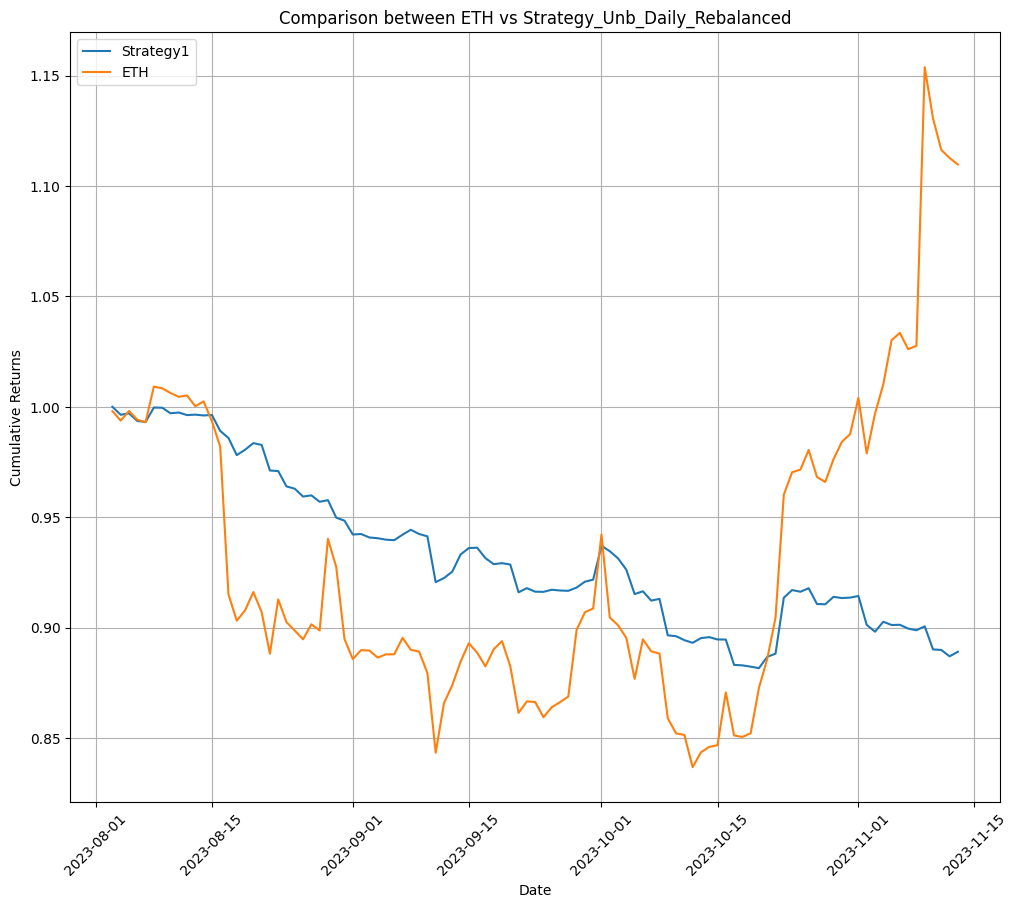

In [21]:
import backtest as bt
import matplotlib.pyplot as plt
import strategy as st

def strategy_silly(df,start_date,end_date):
    # Add columns for the buy range
    df['buy_lower'] = 0.00 * df['close'].shift(1)  # 0.9 times the previous day's close
    df['buy_upper'] = 10000.00 * df['close'].shift(1)  # 1.1 times the previous day's close

    # Initialize a position column
    df['position'] = None

    # Dictionaries to store buy transactions
    buy_transactions = {}
    sell = []

    # Iterate through the DataFrame
    for i in range(1, len(df)):
        # Check if the current close is within the buy range
        if df.loc[df.index[i-1], "position"] is None: 
            df.loc[df.index[i]:,"position"] = "long"
            buy_transactions[df.index[i]] = ( df.loc[df.index[i],'buy_lower'],  df.loc[df.index[i], 'buy_upper']   )

        
        if df.loc[df.index[i-1], "position"] == "long":
            df.loc[df.index[i]:,"position"] = None
            sell.append(df.index[i]) 


    print(f"buy actions {buy_transactions}")
    print(f"sell actions {sell}")
    print(f"the length are equal {len(buy_transactions) == len(sell)}")
    

    return df, buy_transactions, sell

def test0():

    # 設定回測參數(可更改)
    start_date = '2023-08-01 00:00:00'
    end_date = '2023-11-13 03:00:00'
    target = 10000 #初始投入金額
    investment_method = "compound_interest"
    
    #回測
    important_sheets, fee_return = bt.range_backtest(start_date,end_date,target,investment_method, strategy_silly)
    print(fee_return)
    bt.show_analysis(important_sheets,target,fee_return,investment_method)
    return important_sheets
a=test0()
plt.figure(figsize=(12, 10))
plt.title("Comparison between ETH vs Strategy_Unb_Daily_Rebalanced")
plt.plot((1+a.total_value.diff()/a.total_value.shift(1)).cumprod())
plt.plot((1+a.close.diff()/a.close.shift(1)).cumprod())

# Beautifying the plot
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.grid(True)
plt.legend(['Strategy1','ETH'])
plt.xticks(rotation=45)
plt.show()

## test around 2 year unbounded liquidity

buy actions {Timestamp('2022-01-01 00:00:00'): (0, 999999)}
sell actions [Timestamp('2023-11-14 00:00:00')]
the length are equal (1, 1)
Your liquidity was active for: 100.0
0.07462462685649462
------results------
investment0 : 10000
impermanent_loss: -340.7535964864401
fee_return : 746.2462685649463
fee_return% : 7.46%
total_return:-17.79%
annualized_std_dev32.82%
max_drawdown-44.95%
sharpe_ratio-0.42
hold_strategy_value only
total_return:-44.81%
annualized_std_dev70.99%
max_drawdown-74.04%
sharpe_ratio-0.44


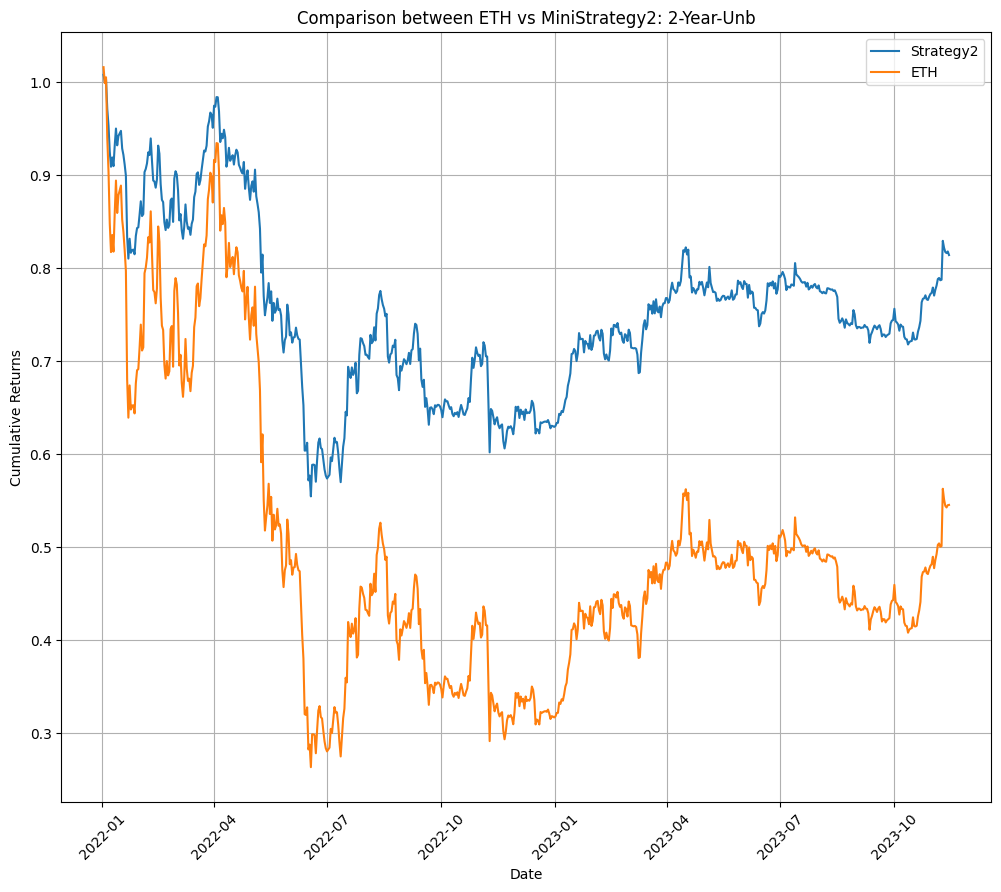

In [22]:
import backtest as bt
import matplotlib.pyplot as plt
import strategy as st
def test2():

    # 設定回測參數(可更改)
    start_date = '2022-01-01 00:00:00'
    end_date = '2023-11-17 03:00:00'
    target = 10000 #初始投入金額
    investment_method = "compound_interest"
    
    #回測
    important_sheets, fee_return = bt.range_backtest(start_date,end_date,target,investment_method, st.simple_long_strategy )
    print(fee_return)
    bt.show_analysis(important_sheets,target,fee_return,investment_method)
    return important_sheets

a=test2()
plt.figure(figsize=(12, 10))
plt.title("Comparison between ETH vs MiniStrategy2: 2-Year-Unb")
plt.plot((1+a.total_value.diff()/a.total_value.shift(1)).cumprod())
plt.plot((1+a.close.diff()/a.close.shift(1)).cumprod())

# Beautifying the plot
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.grid(True)
plt.legend(['Strategy2','ETH'])
plt.xticks(rotation=45)
plt.show()

## We can decide the time to buy and sell (holding period varies)

buy actions {Timestamp('2023-08-20 00:00:00'): (1584.2549859138785, 2021.1720377833617), Timestamp('2023-09-13 00:00:00'): (1531.1098359180176, 1729.6514510768318)}
sell actions [Timestamp('2023-09-12 00:00:00'), Timestamp('2023-10-02 00:00:00')]
the length are equal (2, 2)
Your liquidity was active for: 93.76979594301531
Your liquidity was active for: 97.9399564580569
0.029956839955253445
------results------
investment0 : 10000
impermanent_loss: -352.1126128625692
fee_return : 299.56839955253446
fee_return% : 3.00%
total_return:-0.75%
annualized_std_dev22.10%
max_drawdown-8.25%
sharpe_ratio-0.46
hold_strategy_value only
total_return:0.98%
annualized_std_dev31.18%
max_drawdown-10.60%
sharpe_ratio0.14


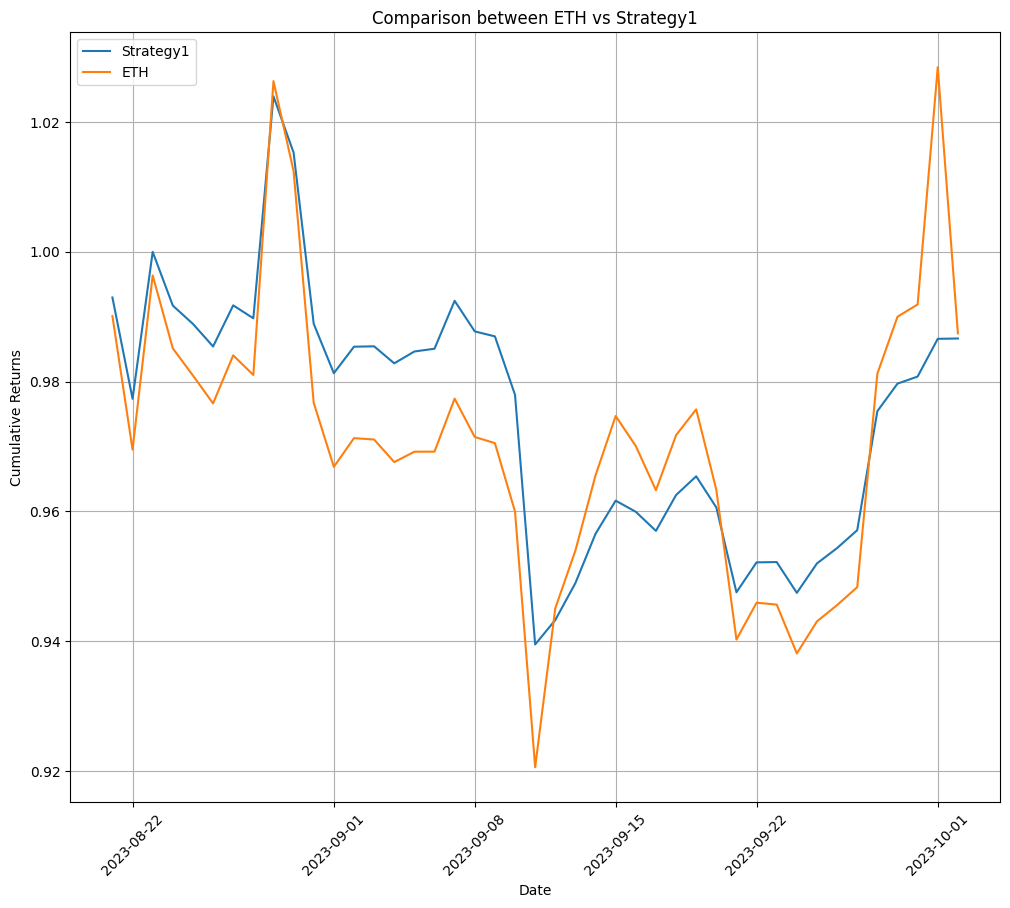

In [23]:
import backtest as bt
import matplotlib.pyplot as plt
import strategy as st
def test1():

    # 設定回測參數(可更改)
    start_date = '2023-07-01 00:00:00'
    end_date = '2023-11-20 03:00:00'
    target = 10000 #初始投入金額
    investment_method = "compound_interest"
    
    #回測
    important_sheets, fee_return = bt.range_backtest(start_date,end_date,target,investment_method, st.my_strategy1 )
    print(fee_return)
    bt.show_analysis(important_sheets,target,fee_return,investment_method)
    return important_sheets
a=test1()
plt.figure(figsize=(12, 10))
plt.title("Comparison between ETH vs Strategy1")
plt.plot((1+a.total_value.diff()/a.total_value.shift(1)).cumprod())
plt.plot((1+a.close.diff()/a.close.shift(1)).cumprod())

# Beautifying the plot
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.grid(True)
plt.legend(['Strategy1','ETH'])
plt.xticks(rotation=45)
plt.show()

## A little tigten range (0.5std) compare to the last BB strategy

buy actions {Timestamp('2023-08-09 00:00:00'): (1841.1141338132632, 1859.7023302438354), Timestamp('2023-08-11 00:00:00'): (1839.3034329911902, 1856.2249522190832), Timestamp('2023-08-13 00:00:00'): (1837.1996402321392, 1850.5070218071232), Timestamp('2023-08-15 00:00:00'): (1834.5467166585822, 1844.9324567281415), Timestamp('2023-09-08 00:00:00'): (1636.2316260173245, 1665.8818577112763), Timestamp('2023-09-15 00:00:00'): (1610.3297384526031, 1635.571219509004), Timestamp('2023-09-17 00:00:00'): (1609.4233579719853, 1634.3054455534511), Timestamp('2023-09-21 00:00:00'): (1604.768832746967, 1631.185356809424), Timestamp('2023-10-05 00:00:00'): (1609.819639601169, 1654.3643258050874), Timestamp('2023-10-07 00:00:00'): (1618.073198158417, 1659.5233173351637), Timestamp('2023-10-09 00:00:00'): (1622.410396055709, 1661.44992937166), Timestamp('2023-10-17 00:00:00'): (1570.4015102239423, 1608.6478649692408), Timestamp('2023-10-20 00:00:00'): (1562.6181559787062, 1592.4238617974067)}
sell ac

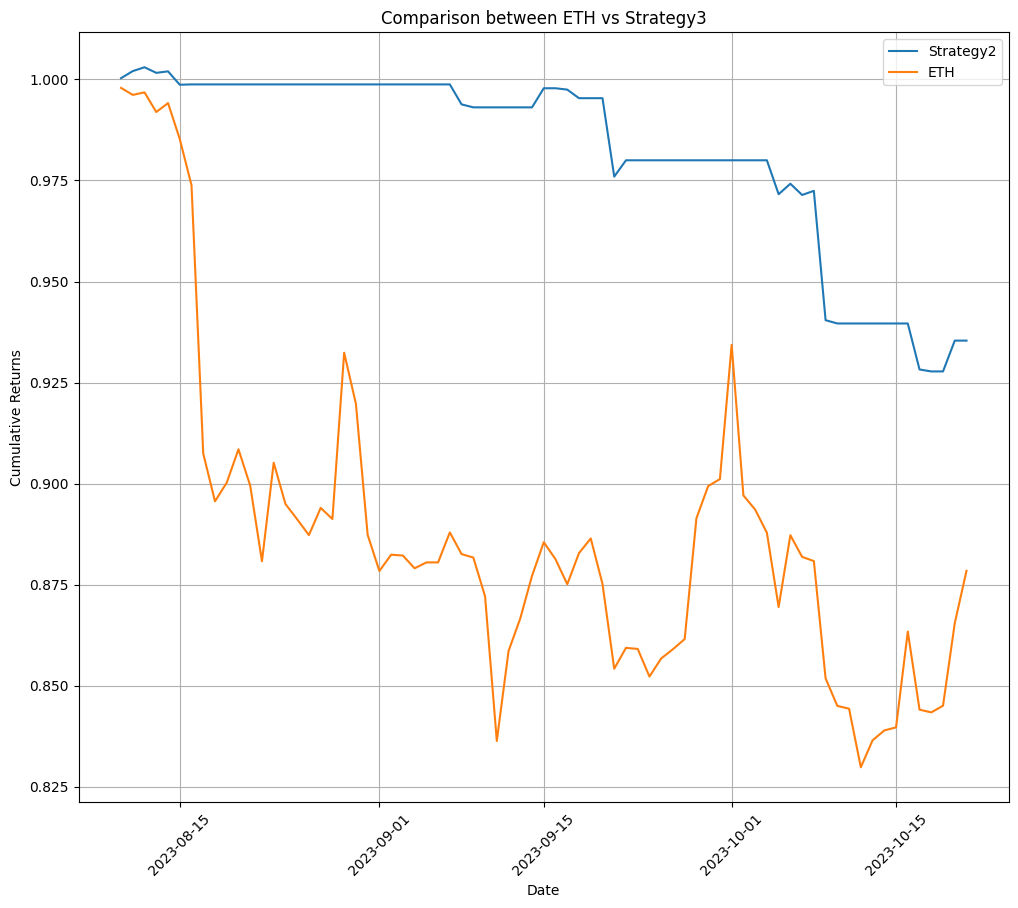

In [8]:
import backtest as bt
import matplotlib.pyplot as plt
import strategy as st
def test3():

    # 設定回測參數(可更改)
    start_date = '2023-07-20 00:00:00'
    end_date = '2023-11-20 03:00:00'
    target = 10000 #初始投入金額
    investment_method = "compound_interest"
    
    #回測
    important_sheets, fee_return = bt.range_backtest(start_date,end_date,target,investment_method, st.simple_long_strategy2 )
    print(fee_return)
    bt.show_analysis(important_sheets,target,fee_return,investment_method)
    return important_sheets

a=test3()
plt.figure(figsize=(12, 10))
plt.title("Comparison between ETH vs Strategy3")
plt.plot((1+a.total_value.diff()/a.total_value.shift(1)).cumprod())
plt.plot((1+a.close.diff()/a.close.shift(1)).cumprod())

# Beautifying the plot
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.grid(True)
plt.legend(['Strategy2','ETH'])
plt.xticks(rotation=45)
plt.show()

## dynamically change the band, a measure of market volatility, so when the market is more volatile, the bands expand, and when it's less volatile, they contract. 

Your liquidity was active for: 91.68724304015873
Your liquidity was active for: 97.8877314368324
Your liquidity was active for: 78.49537317989537
0.044395319659798614
------results------
investment0 : 10000
impermanent_loss: -795.2533605655972
fee_return : 443.95319659798616
fee_return% : 4.44%
total_return:3.76%
annualized_std_dev10.55%
max_drawdown-3.97%
sharpe_ratio1.27
hold_strategy_value only
total_return:12.82%
annualized_std_dev20.86%
max_drawdown-6.08%
sharpe_ratio3.11


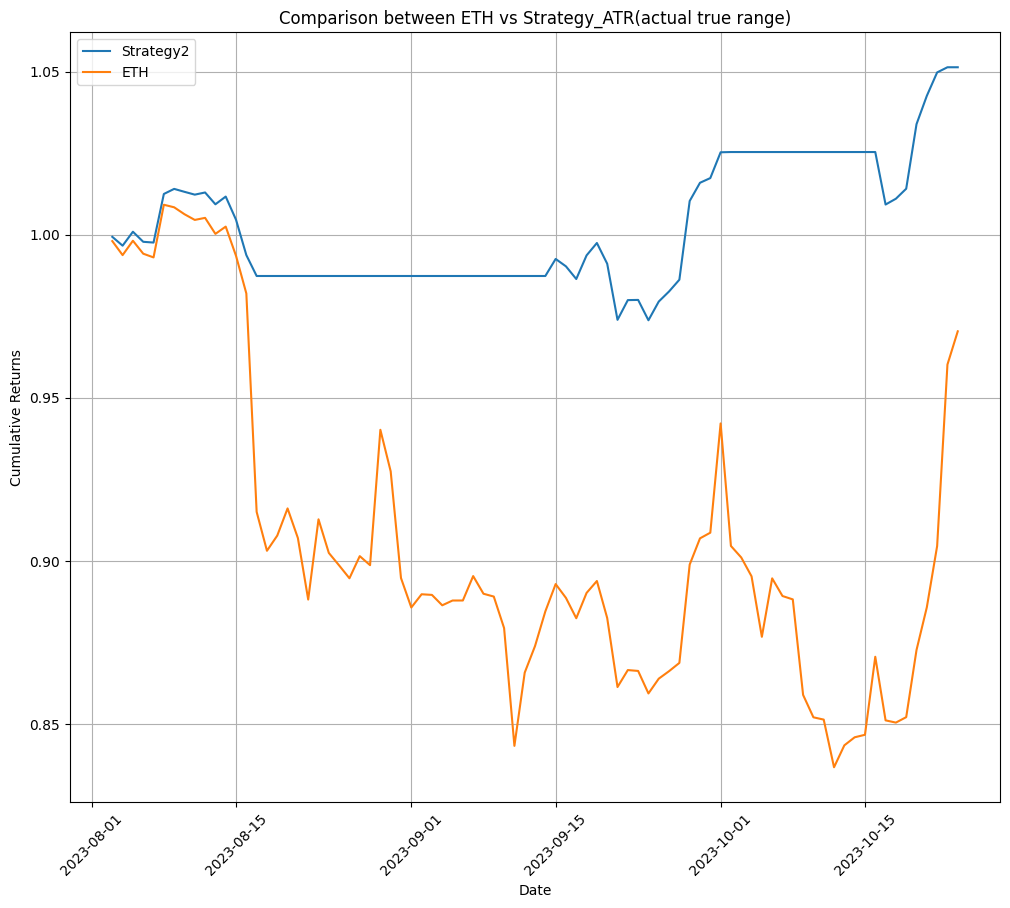

In [9]:
import backtest as bt
import matplotlib.pyplot as plt
import strategy as st
def test5():

    # 設定回測參數(可更改)
    start_date = '2023-07-01 00:00:00'
    end_date = '2023-11-20 03:00:00'
    target = 10000 #初始投入金額
    investment_method = "compound_interest"
    
    #回測
    important_sheets, fee_return = bt.range_backtest(start_date,end_date,target,investment_method, st.my_strategy_atr )
    print(fee_return)
    bt.show_analysis(important_sheets,target,fee_return,investment_method)
    return important_sheets

a=test5()
plt.figure(figsize=(12, 10))
plt.title("Comparison between ETH vs Strategy_ATR(actual true range)")
plt.plot((1+a.total_value.diff()/a.total_value.shift(1)).cumprod())
plt.plot((1+a.close.diff()/a.close.shift(1)).cumprod())

# Beautifying the plot
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.grid(True)
plt.legend(['Strategy2','ETH'])
plt.xticks(rotation=45)
plt.show()

## test this strategy in two-year period

Your liquidity was active for: 100.0
Your liquidity was active for: 99.401692484421
Your liquidity was active for: 99.96937278968586
Your liquidity was active for: 40.269594042503165
Your liquidity was active for: 99.97281595979895
Your liquidity was active for: 90.56506208259262
Your liquidity was active for: 100.0
Your liquidity was active for: 50.22534205217582
Your liquidity was active for: 89.54537021731909
Your liquidity was active for: 100.0
Your liquidity was active for: 100.0
Your liquidity was active for: 99.72333903026106
Your liquidity was active for: 92.53342950536913
Your liquidity was active for: 100.0
Your liquidity was active for: 100.0
Your liquidity was active for: 100.0
Your liquidity was active for: 93.39051061966009
Your liquidity was active for: 95.49275892544328
Your liquidity was active for: 97.88773143683231
Your liquidity was active for: 78.49537317989537
0.3408969288192739
------results------
investment0 : 10000
impermanent_loss: -3507.225729939728
fee_retur

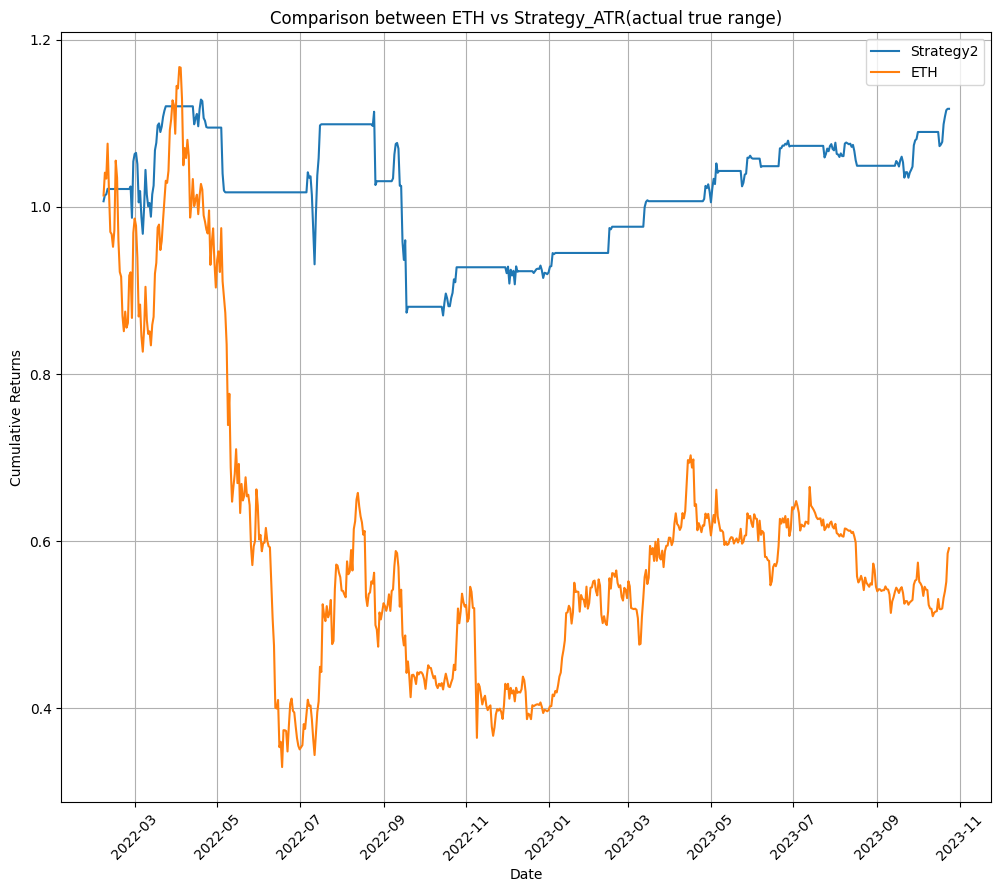

In [24]:
import warnings
warnings.filterwarnings('ignore')
import backtest as bt
import matplotlib.pyplot as plt
import strategy as st
def test5():

    # 設定回測參數(可更改)
    start_date = '2022-01-01 00:00:00'
    end_date = '2023-11-20 03:00:00'
    target = 10000 #初始投入金額
    investment_method = "compound_interest"
    
    #回測
    important_sheets, fee_return = bt.range_backtest(start_date,end_date,target,investment_method, st.my_strategy_atr )
    print(fee_return)
    bt.show_analysis(important_sheets,target,fee_return,investment_method)
    return important_sheets

a=test5()
plt.figure(figsize=(12, 10))
plt.title("Comparison between ETH vs Strategy_ATR(actual true range)")
plt.plot((1+a.total_value.diff()/a.total_value.shift(1)).cumprod())
plt.plot((1+a.close.diff()/a.close.shift(1)).cumprod())

# Beautifying the plot
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.grid(True)
plt.legend(['Strategy2','ETH'])
plt.xticks(rotation=45)
plt.show()

## Anton's RL strategy

In [11]:
import pandas as pd

In [12]:
event = pd.read_csv('Events.csv')
event['ETH_Price_upper'] = 1/event['ETH_Price_upper'] 
event['ETH_Price_low'] = 1/event['ETH_Price_low']

In [13]:
event

,Unnamed: 0,Price_up,Price_low,ETH_Price_upper,ETH_Price_low
0,2023-08-01,201070.000000,200870.000000,1853.862165,1891.310774
1,2023-08-06,201270.665635,201070.665635,1817.034106,1853.738776
2,2023-08-08,201186.764154,200986.764154,1832.342656,1869.356564
3,2023-08-15,201291.000000,201091.000000,1813.343221,1849.973334
4,2023-08-16,201408.000000,201208.000000,1792.251785,1828.455845
...,...,...,...,...,...
57,2023-11-06,200946.000000,200746.000000,1876.992008,1914.907847
58,2023-11-09,199845.000000,199645.000000,2095.443018,2137.771637
59,2023-11-10,199996.782803,199796.782803,2063.879520,2105.570547
60,2023-11-11,200120.204085,199920.204085,2038.564661,2079.744319


In [14]:
df = pd.DataFrame()

In [15]:
df['DATE'] = event['Unnamed: 0']
df['lower'] = event['ETH_Price_upper']
df['higher'] = event['ETH_Price_low']
df

,DATE,lower,higher
0,2023-08-01,1853.862165,1891.310774
1,2023-08-06,1817.034106,1853.738776
2,2023-08-08,1832.342656,1869.356564
3,2023-08-15,1813.343221,1849.973334
4,2023-08-16,1792.251785,1828.455845
...,...,...,...
57,2023-11-06,1876.992008,1914.907847
58,2023-11-09,2095.443018,2137.771637
59,2023-11-10,2063.879520,2105.570547
60,2023-11-11,2038.564661,2079.744319


In [16]:
def anton(a,b,c):
    event = pd.read_csv('Events.csv')
    event['ETH_Price_upper'] = 1/event['ETH_Price_upper'] 
    event['ETH_Price_low'] = 1/event['ETH_Price_low']
    df = pd.DataFrame()
    df['DATE'] = event['Unnamed: 0']
    df['lower'] = event['ETH_Price_upper']            
    df['higher'] = event['ETH_Price_low']
    
    df['DATE'] = pd.to_datetime(df['DATE'])
    buy = {}
    sell = []
    for i in range(len(df)):
        key = df['DATE'][i]
        changed = key.replace(hour=23, minute=0, second=0)
        low = df['lower'][i]
        high = df['higher'][i]
        buy[key] = (low,high)
        sell.append(changed)
    return df, buy, sell

Your liquidity was active for: 11.684080769453283
Your liquidity was active for: 100.0
Your liquidity was active for: 61.361330426803626
Your liquidity was active for: 100.0
Your liquidity was active for: 100.0
Your liquidity was active for: 5.219904835389902
Your liquidity was active for: 57.61906589462652
Your liquidity was active for: 99.76459757814622
Your liquidity was active for: 98.38899767654603
Your liquidity was active for: 26.11299864837957
Your liquidity was active for: 31.384524153131252
Your liquidity was active for: 80.2364515656242
Your liquidity was active for: 93.53603375738953
Your liquidity was active for: 100.0
Your liquidity was active for: 38.96027566561413
Your liquidity was active for: 98.0628327112823
Your liquidity was active for: 31.07421706808715
Your liquidity was active for: 76.1993704288207
Your liquidity was active for: 99.64763297624116
Your liquidity was active for: 97.37868305096735
Your liquidity was active for: 37.70759500047772
Your liquidity was 

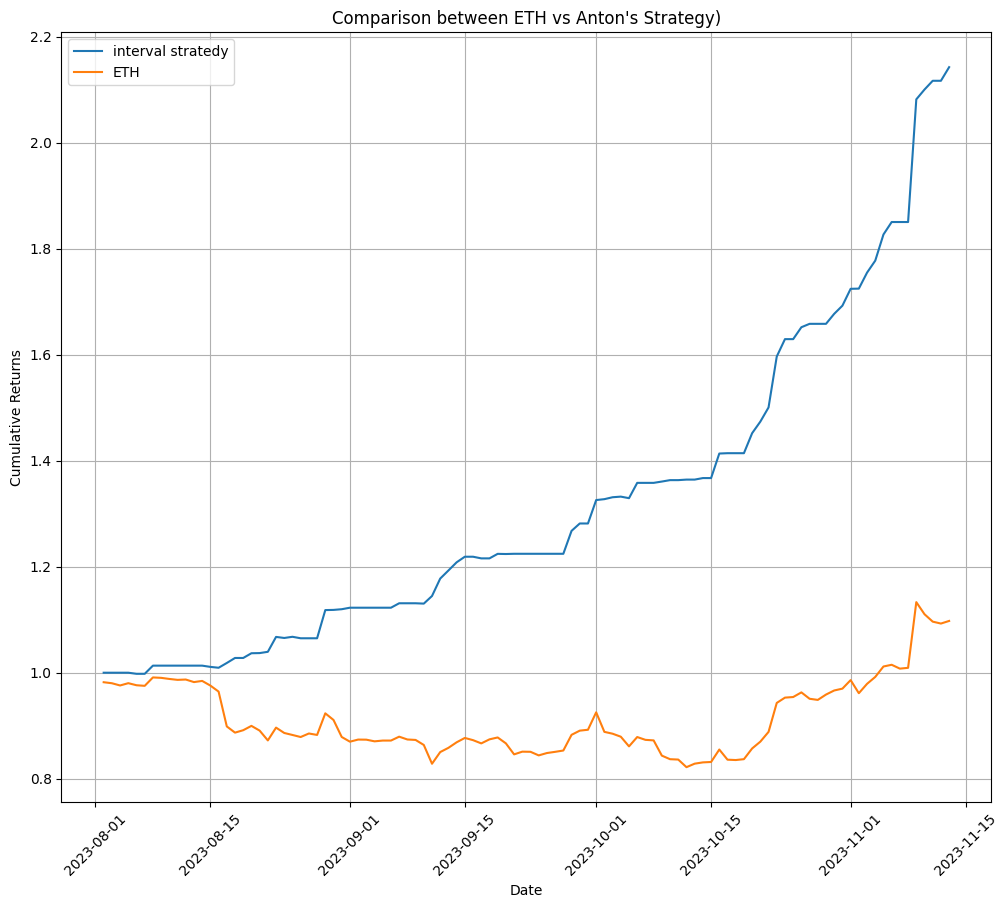

In [25]:
import backtest as bt

def test5():

    # 設定回測參數(可更改)
    start_date = '2023-08-01 00:00:00'
    end_date = '2023-11-14 03:00:00'
    target = 10000 #初始投入金額
    investment_method = "compound_interest"
    #回測
    important_sheets, fee_return = bt.range_backtest(start_date,end_date,target,investment_method, anton)
    print(fee_return)
    bt.show_analysis(important_sheets,target,fee_return,investment_method)
    return important_sheets


a=test5()
plt.figure(figsize=(12, 10))
plt.title("Comparison between ETH vs Anton's Strategy)")
plt.plot((1+a.total_value.diff()/a.total_value.shift(1)).cumprod())
plt.plot((1+a.close.diff()/a.close.shift(1)).cumprod())

# Beautifying the plot
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.grid(True)
plt.legend(['interval stratedy','ETH'])
plt.xticks(rotation=45)
plt.show()